<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Checkpoint_2_LE_CALVE_Catherine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C'est ton second checkpoint.
Les 3 exercices principaux sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères. Ils se basent tous sur le même dataset.

Essaye de finir ce checkpoint en 4h. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori.
Nous t'avons indiqué des durées estimatives. Evidemment chacun a ses forces et ses faiblesses, avance donc à ton rythme. **Cependant, si tu vois que tu dépasses une durée, ne reste pas bloqué, passe à l'exercice suivant.** Tu pourras revenir à la fin sur ce que tu n'as pas fini.

Il y a deux questions bonus à la fin. Ce sont des exercices pour aller plus loin. Ils sont assez stimulants pour de l'analyse.

----------------
**ENGLISH DISCLAIMER**

This is your second checkpoint.
The 3 main exercises are independent. You can do them in the order you prefer. They are all based on the same dataset.

Try to finish this checkpoint in 4 hours. If you don't finish everything, it's not a big deal. You can do it again later, just comment on what you did afterwards.
We have given you estimated times. Obviously everyone has their own strengths and weaknesses, so go at your own pace. **However, if you see that you're going over a time limit, don't get stuck, just move on to the next exercise** You can come back to what you didn't finish at the end.

There are two bonus questions at the end. These are exercises to go further. They are quite challenging for analysis.

# Checkpoint 2
Please execute the code below

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


# Data exploration (approximately 1h30)

## Introduction
Display the first rows of the dataset.

In [2]:
# Your code here : 
df_music.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814


Describe the dataset including all types of columns (i.e. numerical and the others) and comment the column popularity.

In [3]:
# Your code here : 
df_music.describe(include='all') 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,0UE0RhnRaEYsiYgXpyLoZc,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


In [4]:
# for display values of popularity from the biggest to the smallest
df_music.sort_values('popularity', ascending=False)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578000,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578000,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.163000,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.163000,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.042100,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195435,Movie,Sally Dworsky,Inside Out,5d5BLVzCOxhgN02r2XqPWw,0,0.000305,0.456,241400,0.804,0.000018,D,0.0418,-6.346,Major,0.0382,123.405,4/4,0.487
195434,Movie,Mike Douglas,September Song,5VSpKjPu6bud6KHyyWQrJ1,0,0.839000,0.331,282720,0.221,0.000189,A#,0.1030,-15.866,Major,0.0298,76.001,4/4,0.071
195433,Movie,Keith David,The Christmas Story,5JdfRifr7rjLNy9kegVu5z,0,0.653000,0.604,207040,0.365,0.000097,C,0.1560,-12.274,Major,0.3360,123.490,3/4,0.254
195432,Movie,Charlton Heston,Chorus: Come And Go With Me,5IF0TxLi4Jzo0qEdxhZbUy,0,0.972000,0.482,83667,0.312,0.000000,F#,0.1780,-18.565,Major,0.0456,78.739,4/4,0.281


In [5]:
#premier apperçu des acteurs les plus présents toutes catégories confondues
df_music['popularity'].value_counts()

0      6312
50     5415
53     5414
51     5401
52     5342
       ... 
96        8
94        7
99        4
98        3
100       2
Name: popularity, Length: 101, dtype: int64

Please check the presence / absence of missing values in each column and comment your result.

In [6]:
# Your code here : 
# .sum for count or .any for true or false

print(df_music.isnull().any())

print(f"there aren't Nan values in df_music, all the df is complete")

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool
there aren't Nan values in df_music, all the df is complete


In [7]:
#comment the column popularity.
print(f"Popularity column is a percent of popularity 'track_name' on all dataset. The values goes in 0 to 100.")

Popularity column is a percent of popularity 'track_name' on all dataset. The values goes in 0 to 100.


## Some insights about the artists

Give the number of tracks for each artist. The result will be sorted by descending order for a better readability.

*You can use `groupby`, `crosstab` or `pivot_table` to solve these questions.*


In [8]:
df_music.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
# Group artist with they tracknames in pivot table
pivot_table_music = df_music.pivot_table(values = 'track_name', index = 'artist_name', aggfunc = np.sum)
pivot_table_music

,track_name
artist_name,
!!!,Even When The Water's ColdEven When The Water'...
"""Weird Al"" Yankovic","Amish Paradise (Parody of ""Gangsta's Paradise""..."
$NOT,GOSHAExcuse MeBilly BoyMotorola
$olal,Psycho Girls & Psycow Boys - Haaksman & Haaksm...
$teven Cannon,Inxanity
...,...
鉤貫レム(CV.斉藤壮馬),我が名はレム・アーロンドDESTINARE!
黒崎真音,DEAD OR LIEGravitationX-encounter君と太陽が死んだ日メモリー...
알레프 ALEPH,No One Told Me Why


In [10]:
# calculate number of title for each artist in my pivot table and create column
pivot_table_music['number_tracks_for_artist'] = pivot_table_music['track_name'].str.split("/").str.len()

In [11]:
# display my table : pivot_table_music
pivot_table_music.sort_values('number_tracks_for_artist', ascending=False, inplace=True)
pivot_table_music.reset_index(inplace=True)
pivot_table_music

,artist_name,track_name,number_tracks_for_artist
0,Giuseppe Verdi,La Traviata / Act 1: Libiamo ne'lieti caliciRi...,532
1,Giacomo Puccini,"""Nessun dorma!""Gianni Schicchi: ""O mio babbino...",424
2,Richard Wagner,"Tannhäuser: OvertureDie Walkure, Act III: Ride...",269
3,Kimbo Children's Music,Plié and Relevé (Vocal)The Mermaid Ballet (Ins...,241
4,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",220
...,...,...,...
14559,Iration & Mikey Dread,Generation Time (Feat. Mikey Dread),1
14560,Irene Cara,What A Feeling,1
14561,Iris DeMent,Our TownLet the Mystery BeOur TownLet the Myst...,1
14562,Iris Temple,LemonadeCapsizeLemonadeCapsizeFernsTheatreLemo...,1



Give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [12]:
# Your code here : 

# mean of popularity for each artist sorted by descending order
popularity_artist = round(df_music.groupby(by=['artist_name']).mean('popularity'),2).sort_values(['popularity'], ascending=False).reset_index()
popularity_artist

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Pedro Capó,87.0,0.26,0.78,209133.00,0.70,0.00,0.11,-4.77,0.05,126.91,0.66
1,Mario Bautista,85.0,0.03,0.80,218470.00,0.70,0.00,0.20,-5.27,0.20,103.01,0.45
2,Mau y Ricky,83.0,0.08,0.72,230026.50,0.71,0.00,0.20,-4.51,0.20,172.99,0.74
3,Kris Kross Amsterdam,82.0,0.15,0.73,163636.00,0.76,0.00,0.23,-5.56,0.06,109.99,0.52
4,Ninho,82.0,0.68,0.66,157076.00,0.68,0.00,0.12,-6.16,0.16,137.83,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
14559,Brent Holmes,0.0,0.38,0.73,201280.00,0.33,0.00,0.11,-12.51,0.05,116.47,0.60
14560,The Wayfarers,0.0,0.68,0.63,200017.75,0.34,0.00,0.18,-13.21,0.06,123.14,0.78
14561,Nursery Rhymes Club,0.0,0.48,0.53,141199.00,0.39,0.49,0.08,-13.32,0.13,193.72,0.69
14562,Renee & Jeremy,0.0,0.37,0.74,194173.50,0.64,0.00,0.08,-7.02,0.03,108.52,0.73


In [13]:
# In addition, who are the 3 most popular artists ?

print(f"The 3 most popular artists are : \n- {popularity_artist['artist_name'][0]} \n- {popularity_artist['artist_name'][1]}  \n- {popularity_artist['artist_name'][2]}")


The 3 most popular artists are : 
- Pedro Capó 
- Mario Bautista  
- Mau y Ricky


## What about Queen?
Give the track names of Queen.

In [14]:
title_Queen = df_music.loc[df_music['artist_name'] == "Queen", [ "track_name", 'popularity']].reset_index(drop=True).rename(columns={'track_name':'Track_of_Queen'}).sort_values('popularity', ascending=False)
title_Queen

,Track_of_Queen,popularity
13,Bohemian Rhapsody - Remastered 2011,82
14,Don't Stop Me Now - Remastered,81
16,Somebody To Love - Remastered 2011,77
15,Under Pressure - Remastered,77
17,We Will Rock You - Remastered,76
...,...,...
12,The Prophet's Song - Remastered 2011,47
11,Dragon Attack - Remastered 2011,47
10,Good Company - Remastered 2011,47
9,Hammer To Fall,47


What are the mean popularity of all songs from the Queen band?

What are their 3 most popular songs?

In [15]:
# Your code here : 

print(f"The 3 most popular songs are : \n- {title_Queen['Track_of_Queen'][0]} \n- {title_Queen['Track_of_Queen'][1]}  \n- {title_Queen['Track_of_Queen'][2]}")


The 3 most popular songs are : 
- We Are The Champions 
- Get Down, Make Love - Remastered 2011  
- Sheer Heart Attack - Remastered 2011


## Transform (apply ?)
Create a new column `nb_words`, with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [16]:
# Your code here : 

df_music['nb_words'] = df_music['track_name'].str.split(" ").str.len()
df_music.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,6
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,5
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,6
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


## Pivot table
Let's do a pivot table with `genre` in rows, `mode` in columns and number of songs in values. 

Which genre-mode duo contains the most songs?

In [17]:
#pivot_table_music2 = pivot_table_music.copy().rename(columns={'number_tracks_for_artist':'number of songs'})
pivot_table_music.head()


,artist_name,track_name,number_tracks_for_artist
0,Giuseppe Verdi,La Traviata / Act 1: Libiamo ne'lieti caliciRi...,532
1,Giacomo Puccini,"""Nessun dorma!""Gianni Schicchi: ""O mio babbino...",424
2,Richard Wagner,"Tannhäuser: OvertureDie Walkure, Act III: Ride...",269
3,Kimbo Children's Music,Plié and Relevé (Vocal)The Mermaid Ballet (Ins...,241
4,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",220


In [18]:
# Your code here : 

#reate pivot table
pivot_table_music2 = df_music.pivot_table(values = 'track_name', columns='mode', index = 'genre', aggfunc = np.sum)

#add two columns Major and Major with number title for each category
pivot_table_music2['number_tracks_Major'] = pivot_table_music2['Major'].str.split(",").str.len()
pivot_table_music2['number_tracks_Minor'] = pivot_table_music2['Major'].str.split(",").str.len()

#reorganize colums
pivot_table_music2 = pivot_table_music2[['Major','number_tracks_Major', 'Minor','number_tracks_Minor']]


In [19]:
# add colums with sum of two categories number_tracks_Major and number_tracks_Minor and sorted by descending order

pivot_table_music2['sum_number_tracks'] = pivot_table_music2['number_tracks_Major'] + pivot_table_music2['number_tracks_Minor']
pivot_table_music2 = pivot_table_music2.sort_values('sum_number_tracks', ascending=False)
pivot_table_music2.head()

mode,Major,number_tracks_Major,Minor,number_tracks_Minor,sum_number_tracks
genre,,,,,
Classical,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",5614,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",5614,11228
Opera,"Ave MariaTannhäuser: Overture""Nessun dorma!""Se...",5155,"Meditation: Méditation from ThaïsRinaldo, HWV ...",5155,10310
Children's Music,The Best Day EverThe Excavator SongBaby Shark ...,540,Itsy Bitsy SpiderHumilityEleanor RigbyThe Goof...,540,1080
Comedy,Fuck Her GentlyFrom God's PerspectiveA Place C...,525,People WatchingDon't Tell AnyoneOddly RacistMa...,525,1050
Movie,C'est beau de faire un ShowDis-moi Monsieur Go...,471,Perdu d'avance (par Gad Elmaleh)Don't Let Me B...,471,942


In [20]:
f" The genre-mode duo contains the most songs is classical"

' The genre-mode duo contains the most songs is classical'

# Dataviz (approximately 1h30)

## Remember, each chart must have :
- beautiful colors
- title
- readable axis ticks
- legend

## Display a correlation heatmap
Color scale has to be **centered on 0-value**, in order to distinguish negative and positive values. Please choose a beautiful **diverging palette**, and remember to **display a title**.


In [21]:
df_music_corr = df_music.corr()
df_music_corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,nb_words
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,-0.226041
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.297207
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.229582
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,0.108421
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.287224
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.119395
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.044689
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.338822
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.047410
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.086280


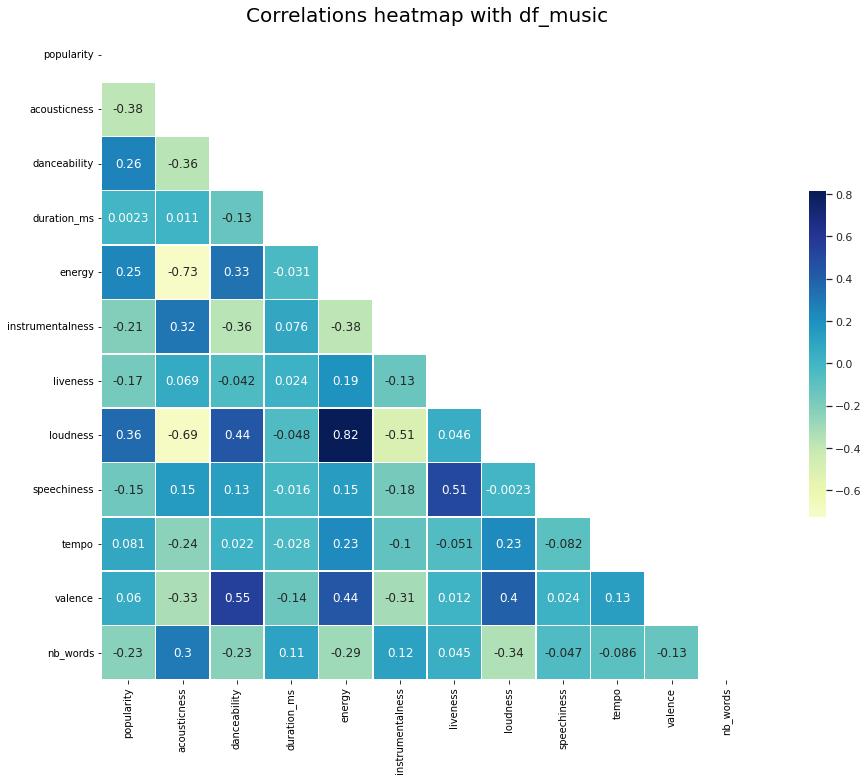

In [22]:
#taille heatmap
plt.subplots(figsize=(20, 12))

#style
sns.set_theme(style="white")

#heatmap with only direction
mask = np.triu(np.ones_like(df_music_corr, dtype=bool))

# heatmap
sns.heatmap(df_music_corr,                    
                              
            cmap="YlGnBu",              # palette de couleur
            mask=mask,
            center=0,                   # La valeur à laquelle centrer la palette de couleurs 
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            annot=True,                 # afficher les valeurs           
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().

plt.title('Correlations heatmap with df_music', size = 20)

plt.show()

Some columns seem to have strong (negative) correlations between them. 
- Which ones? 
- What does it mean?

In [23]:
min_value = pd.DataFrame(df_music_corr.min())
min_value

,0
popularity,-0.381295
acousticness,-0.725576
danceability,-0.364941
duration_ms,-0.141811
energy,-0.725576
instrumentalness,-0.506320
liveness,-0.167995
loudness,-0.690202
speechiness,-0.177147
tempo,-0.238247


In [24]:
# Your answers here :

print(f"Colums seem to have strong negative correaltions beatween them are energy and acousticness \nThis means that evolve together but in opposition. \nThe values ​​of one tend to increase while the values ​​of the other decrease.")


Colums seem to have strong negative correaltions beatween them are energy and acousticness 
This means that evolve together but in opposition. 
The values ​​of one tend to increase while the values ​​of the other decrease.


## Find the correlation coefficient between Energy and Acousticness

In [25]:
# Your code here :

corr_Energy_Ac = round(df_music["energy"].corr(df_music["acousticness"]),2)
corr_Energy_Ac

-0.73

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot with different colors for genres (so you'll have 2 colors).

*If the dataset is too big, you can use sampling methods.*

In [26]:
df_music.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,6
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,5
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,6
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


In [27]:
# Your code here :


#select genres
df_graph = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')]



In [28]:
df_graph_pairplot = df_graph.copy()


# create a sample with random state because  the dataset is too big
df_graph_pairplot = df_graph_pairplot.sample(10, random_state=42)

#graph

fig = px.scatter_matrix(data_frame = df_graph_pairplot,
                 color='genre'
                 )


fig.update_layout(title ="<b>Genre Opera and Reggaeton",
                  title_x = 0.5,
                  
                  dragmode='select',
                  width=2000,
                  height=2000,
                  hovermode='closest')
fig.show()

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Include only genres Opera and Reggaeton
- Each genre has its own color
- Please choose beautiful colors, and remember to display a title.

In [29]:
df_graph_scatter = df_graph.copy()
df_graph_scatter.sample(500, random_state=42)
df_graph_scatter.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
57582,Opera,Charles Gounod,Ave Maria,2kyEgPaAW8wdpvevPnkf0Z,62,0.993,0.1320,163267,0.0195,0.88800,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400,2
57583,Opera,Richard Wagner,Tannhäuser: Overture,1U1i1HBJ5H8DY5J4fO8ySg,58,0.831,0.0843,853827,0.1820,0.92600,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604,2
57584,Opera,Giacomo Puccini,"""Nessun dorma!""",74WjYdm3Lvbwnds4thYPUU,63,0.961,0.1710,180933,0.3080,0.00546,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889,2
57585,Opera,Gioachino Rossini,Semiramide: Overture (Live),2wG5UNal67Vkyjsdm3Ahat,2,0.896,0.2590,746600,0.1980,0.67900,A,0.6890,-19.621,Major,0.0658,158.284,4/4,0.1590,3
57586,Opera,Gioachino Rossini,Overture (Sinfonia),1chTrqszWQEOP4RsNuOZf7,52,0.911,0.3390,425000,0.1400,0.67800,E,0.1570,-20.598,Major,0.0470,95.975,4/4,0.2960,2


In [30]:
fig = px.scatter(df_graph_scatter,
           x = "popularity",
           y = "artist_name",
           color='genre',
           size = 'popularity', 
           size_max=25,
           template='plotly_dark',
           labels={
           'artist_name': 'Name of artist'})

fig.update_layout(width=1300, height=1000, title='Popularity artist between Reggaeton and Opera')

fig.show()

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability

Your chart must be similar to this one (without the red arrow)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

In [31]:
# Your code here :

df_boxplot = df_graph.copy()
df_boxplot.sample(500, random_state=42)
df_boxplot



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
57582,Opera,Charles Gounod,Ave Maria,2kyEgPaAW8wdpvevPnkf0Z,62,0.9930,0.1320,163267,0.0195,0.888000,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400,2
57583,Opera,Richard Wagner,Tannhäuser: Overture,1U1i1HBJ5H8DY5J4fO8ySg,58,0.8310,0.0843,853827,0.1820,0.926000,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604,2
57584,Opera,Giacomo Puccini,"""Nessun dorma!""",74WjYdm3Lvbwnds4thYPUU,63,0.9610,0.1710,180933,0.3080,0.005460,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889,2
57585,Opera,Gioachino Rossini,Semiramide: Overture (Live),2wG5UNal67Vkyjsdm3Ahat,2,0.8960,0.2590,746600,0.1980,0.679000,A,0.6890,-19.621,Major,0.0658,158.284,4/4,0.1590,3
57586,Opera,Gioachino Rossini,Overture (Sinfonia),1chTrqszWQEOP4RsNuOZf7,52,0.9110,0.3390,425000,0.1400,0.678000,E,0.1570,-20.598,Major,0.0470,95.975,4/4,0.2960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166052,Reggaeton,Juhn,Burberry,6X7OHq7Fjdkl8jgJ7s2SsE,21,0.0200,0.7880,220961,0.8430,0.000000,G,0.1130,-5.417,Major,0.2410,135.874,4/4,0.4000,1
166053,Reggaeton,Musicologo Y Menes,Adicta (feat. Nicky Jam),2SNvQUgGOz7TtvTGbWUd1Z,24,0.0200,0.7730,181985,0.9200,0.000000,F#,0.1190,-4.117,Minor,0.0345,102.006,4/4,0.7590,4
166054,Reggaeton,Alex Kyza,Quien Te Dijo (REMIX) (feat. De La Ghetto),2SybcKL6xs1KizvciGmlwG,17,0.0158,0.8310,295187,0.7260,0.000011,C#,0.0823,-5.327,Minor,0.0380,96.998,4/4,0.4000,8
166055,Reggaeton,N'Klabe,Bailala Como Quieras,5morCKZwjNzpByAkdHyBQB,21,0.4450,0.7990,228573,0.8560,0.000007,A#,0.1690,-3.715,Major,0.1460,99.090,4/4,0.9430,3


In [32]:

fig = px.box(df_boxplot, x="genre", y="danceability",
             color='genre',
             template='plotly_dark',
             boxmode="overlay")

fig.update_layout(width=1300, height=1000,
                  title='Dance ability between Reggaeton and Opera',
                  yaxis_title='Dance ability')

fig.show()


How do we read it ?
- What does the horizontal line near the red arrow represent? What does it mean?

In [33]:
# Your answer here :

print(f"the horizontal line near the red represent the third quartile. \nIs the value under which 75% of data values are found ")


the horizontal line near the red represent the third quartile. 
Is the value under which 75% of data values are found 


# **From this exercise, it is carried out outside the time of the checkpoint**

## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

In [34]:
df_histo = df_music.copy()
df_histo = df_histo[(df_histo['genre']=='Country')].sample(500, random_state=42)
df_histo.head(2)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
3723,Country,Riley Green,Chasin' This Drunk,6waqOBRonTv3mJM5VpB6lv,41,0.0996,0.493,190405,0.628,0.000006,F#,0.1250,-7.085,Major,0.0360,155.882,3/4,0.672,3
7807,Country,Smithfield,Still a Few,2bzqnX0GxcYw2BHTxqwtC8,19,0.3310,0.520,198053,0.621,0.000000,A,0.0877,-4.480,Major,0.0336,141.847,4/4,0.385,3


In [35]:
# Your code here :

fig = px.histogram(df_histo, x = 'energy',
                   color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_layout(width=1000, height=800,
                  bargap=0.2,
                  title='<b>Distribution of music energy for the Country gender<b>',
                  title_x = 0.5,
                  font_size = 15,
                  title_font_color="green",
                  xaxis_title='Music Energy',
                  yaxis_title='Distribution of Energy'
                  )

fig.show()

## Interactive chart
With plotly express, draw an interactive **histogram on energy**. 
- You'll add an animation frame on `genre`.
- Please be sure that the vertical scale is appropriate. Histograms should not "stick out" vertically, regardless of the `genre`.
- Don't forget the title.

In [36]:
df_histo_interactive = df_music.copy()
df_histo_interactive = df_histo_interactive.sample(500, random_state=42)
df_histo_interactive.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
788,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.00015,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850,3
207109,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.56800,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487,2


In [37]:
# Your code here :

fig = px.histogram(df_histo_interactive, x = 'energy',
                   color='genre',
                   animation_frame="genre")

fig.update_layout(width=1000, height=800,
                  bargap=0.2,
                  title='<b>Distribution of music energy for the all gender<b>',
                  title_x = 0.5,
                  font_size = 15,
                  title_font_color="green",
                  xaxis_title='Music Energy',
                  yaxis_title='Distribution of Energy' )

fig.show()


# Machine Learning : Classification (approximately 1h30)

Train a classification model that predicts the genre between Opera and Reggaeton of a track with wichever columns you want. You can try different algorithms.

Try to get the best accuracy score on your test set!!! (without overfitting)

Please display a confusion matrix as well.

In [38]:
# Your code here:
df_opera_reggaeton = df_music.loc[df_music["genre"].isin(["Opera", "Reggaeton"])]
df_opera_reggaeton


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
57582,Opera,Charles Gounod,Ave Maria,2kyEgPaAW8wdpvevPnkf0Z,62,0.9930,0.1320,163267,0.0195,0.888000,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400,2
57583,Opera,Richard Wagner,Tannhäuser: Overture,1U1i1HBJ5H8DY5J4fO8ySg,58,0.8310,0.0843,853827,0.1820,0.926000,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604,2
57584,Opera,Giacomo Puccini,"""Nessun dorma!""",74WjYdm3Lvbwnds4thYPUU,63,0.9610,0.1710,180933,0.3080,0.005460,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889,2
57585,Opera,Gioachino Rossini,Semiramide: Overture (Live),2wG5UNal67Vkyjsdm3Ahat,2,0.8960,0.2590,746600,0.1980,0.679000,A,0.6890,-19.621,Major,0.0658,158.284,4/4,0.1590,3
57586,Opera,Gioachino Rossini,Overture (Sinfonia),1chTrqszWQEOP4RsNuOZf7,52,0.9110,0.3390,425000,0.1400,0.678000,E,0.1570,-20.598,Major,0.0470,95.975,4/4,0.2960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166052,Reggaeton,Juhn,Burberry,6X7OHq7Fjdkl8jgJ7s2SsE,21,0.0200,0.7880,220961,0.8430,0.000000,G,0.1130,-5.417,Major,0.2410,135.874,4/4,0.4000,1
166053,Reggaeton,Musicologo Y Menes,Adicta (feat. Nicky Jam),2SNvQUgGOz7TtvTGbWUd1Z,24,0.0200,0.7730,181985,0.9200,0.000000,F#,0.1190,-4.117,Minor,0.0345,102.006,4/4,0.7590,4
166054,Reggaeton,Alex Kyza,Quien Te Dijo (REMIX) (feat. De La Ghetto),2SybcKL6xs1KizvciGmlwG,17,0.0158,0.8310,295187,0.7260,0.000011,C#,0.0823,-5.327,Minor,0.0380,96.998,4/4,0.4000,8
166055,Reggaeton,N'Klabe,Bailala Como Quieras,5morCKZwjNzpByAkdHyBQB,21,0.4450,0.7990,228573,0.8560,0.000007,A#,0.1690,-3.715,Major,0.1460,99.090,4/4,0.9430,3


In [39]:
#factorize column genre
df_opera_reggaeton2 = df_opera_reggaeton.copy()
df_opera_reggaeton2['genre'] = df_opera_reggaeton2['genre'].factorize()[0]

df_opera_reggaeton2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
57582,0,Charles Gounod,Ave Maria,2kyEgPaAW8wdpvevPnkf0Z,62,0.993,0.1320,163267,0.0195,0.88800,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400,2
57583,0,Richard Wagner,Tannhäuser: Overture,1U1i1HBJ5H8DY5J4fO8ySg,58,0.831,0.0843,853827,0.1820,0.92600,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604,2
57584,0,Giacomo Puccini,"""Nessun dorma!""",74WjYdm3Lvbwnds4thYPUU,63,0.961,0.1710,180933,0.3080,0.00546,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889,2
57585,0,Gioachino Rossini,Semiramide: Overture (Live),2wG5UNal67Vkyjsdm3Ahat,2,0.896,0.2590,746600,0.1980,0.67900,A,0.6890,-19.621,Major,0.0658,158.284,4/4,0.1590,3
57586,0,Gioachino Rossini,Overture (Sinfonia),1chTrqszWQEOP4RsNuOZf7,52,0.911,0.3390,425000,0.1400,0.67800,E,0.1570,-20.598,Major,0.0470,95.975,4/4,0.2960,2


In [40]:
df_corr = df_opera_reggaeton2.corr()
df_corr

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,nb_words
genre,1.000000,0.730987,-0.936686,0.903552,-0.104164,0.922137,-0.426377,-0.043135,0.848425,0.393340,0.288147,0.779855,-0.627376
popularity,0.730987,1.000000,-0.682320,0.666622,-0.069491,0.665529,-0.299844,-0.080543,0.654693,0.258868,0.222388,0.548305,-0.501577
acousticness,-0.936686,-0.682320,1.000000,-0.859372,0.107919,-0.889697,0.385350,0.031472,-0.802968,-0.353683,-0.269075,-0.738416,0.585542
danceability,0.903552,0.666622,-0.859372,1.000000,-0.185076,0.847808,-0.446000,-0.033853,0.786869,0.396535,0.239217,0.805188,-0.549116
duration_ms,-0.104164,-0.069491,0.107919,-0.185076,1.000000,-0.117238,0.133466,-0.032425,-0.093045,-0.046359,-0.063366,-0.191991,0.124657
energy,0.922137,0.665529,-0.889697,0.847808,-0.117238,1.000000,-0.408783,0.034772,0.913728,0.340934,0.262096,0.814440,-0.577428
instrumentalness,-0.426377,-0.299844,0.385350,-0.446000,0.133466,-0.408783,1.000000,-0.095213,-0.426262,-0.235645,-0.124878,-0.329810,0.191479
liveness,-0.043135,-0.080543,0.031472,-0.033853,-0.032425,0.034772,-0.095213,1.000000,0.002909,0.103915,-0.025566,0.006112,0.090896
loudness,0.848425,0.654693,-0.802968,0.786869,-0.093045,0.913728,-0.426262,0.002909,1.000000,0.318368,0.252816,0.713369,-0.556542
speechiness,0.393340,0.258868,-0.353683,0.396535,-0.046359,0.340934,-0.235645,0.103915,0.318368,1.000000,0.186722,0.280391,-0.204028


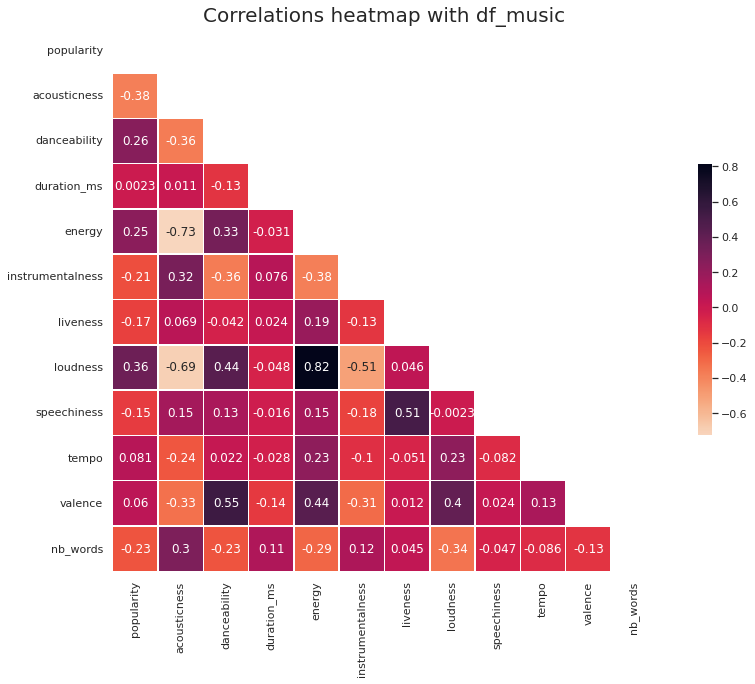

In [41]:
#taille heatmap
plt.subplots(figsize=(15, 10))

#style
sns.set_theme(style="darkgrid")

#heatmap with only direction
mask = np.triu(np.ones_like(df_music_corr, dtype=bool))

# heatmap
sns.heatmap(df_music_corr,                    
                              
            cmap="rocket_r",              # palette de couleur
            mask=mask,
            center=0,                   # La valeur à laquelle centrer la palette de couleurs 
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            annot=True,                 # afficher les valeurs           
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().

plt.title('Correlations heatmap with df_music', size = 20)

plt.show()

In [42]:
# accuracy score and confusion matrix


X = df_opera_reggaeton2[["popularity"]] 
y = df_opera_reggaeton2['genre'] 

#Split your data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)

newmodel = LogisticRegression().fit(X_train, y_train)

print(f"The accuracy score for training set: {round(newmodel.score(X_train, y_train),2)}")
print(f"The accuracy score  for test set: {round(newmodel.score(X_test, y_test),2)}")

f"with loudness and acousticnes we have an overfitting. I try with popularity"

The accuracy score for training set: 0.88
The accuracy score  for test set: 0.87


'with loudness and acousticnes we have an overfitting. I try with popularity'

In [43]:
popularity_predict = newmodel.predict(X_train)

# Display the Confusion Matrix - Show the Confusion Matrix
confusion_matrix(y_train, popularity_predict)

array([[5495,  744],
       [ 861, 5805]])

Now train with the same parameters on these 2 genres: Rap and Hip-Hop.
You should have lower score than previously, why?

In [44]:
# Your code here
df_Rap_HipHop = df_music.loc[df_music["genre"].isin(["Rap", "Hip-Hop"])]
df_Rap_HipHop.head()

# accuracy score and confusion matrix


X = df_Rap_HipHop[["popularity"]] 
y = df_Rap_HipHop['genre'] 

#Split your data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)

newmodel2 = LogisticRegression().fit(X_train, y_train)

print(f"The accuracy score for training set: {round(newmodel2.score(X_train, y_train),2)}")
print(f"The accuracy score  for test set: {round(newmodel2.score(X_test, y_test),2)}")

The accuracy score for training set: 0.55
The accuracy score  for test set: 0.55


In [45]:
popularity_predict = newmodel2.predict(X_train)

# Display the Confusion Matrix - Show the Confusion Matrix
confusion_matrix(y_train, popularity_predict)

array([[4205, 2770],
       [3521, 3399]])

In [46]:
# You should have lower score than previously, why ?

#je n'arrive pas à interpréter les résulats

# Machine Learning : Regression (bonus question)
In this part we will try to predict the **"loudness"** of a track. 

## Univariate regression
First we will train an **univariate linear regression** model.

Find the most correlated column with **loudness**.

In [47]:
# Your code here :

loudness_corr =  df_music_corr[['loudness']].sort_values(by='loudness', ascending=False)
loudness_corr

,loudness
loudness,1.000000
energy,0.816088
danceability,0.438668
valence,0.399901
popularity,0.363011
tempo,0.228364
liveness,0.045686
speechiness,-0.002273
duration_ms,-0.047618
nb_words,-0.338822


In [48]:
var_corr = ['energy']

X = df_music[var_corr]
y = df_music['loudness']


Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [49]:
# Your code here :

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20)

Now train your model on the train set.

In [50]:
# Your code here :

lr_model = LinearRegression().fit(X_train, y_train)

print(f"R2 score for training set: {round(lr_model.score(X_train, y_train),4)}")


R2 score for training set: 0.6653


And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [51]:
# Your code here :

print(f"R2 score for test set: {round(lr_model.score(X_test, y_test),4)}")


R2 score for test set: 0.669


Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.

You should get something like this. But of course, your graphic will have nicer colors, and a title!

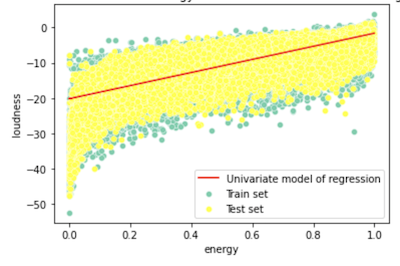

Print the equation of the regression.

In [52]:
# Replace a and b by the coefficients

print("a * x + b")

a * x + b


Please predict the "**loudness**" for a an energy of 0.62

In [53]:
# Your code here :



## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns. 

You will do all the needed steps and keep a `random_state` of 1.

Your test score should be : `0.7650705916016727`. Is there overfitting?

In [54]:
columns =["acousticness", "danceability", "duration_ms", "energy",
          "instrumentalness", "liveness", "popularity", "speechiness", "tempo", "valence"]



# Comparison between the top 1% popularity and the total dataset (bonus question)
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)




![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

In [55]:
# Your code here :

